<a href="https://colab.research.google.com/github/crispianm/MDM3-UKCRIC/blob/main/TestingDNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os 
import sys


In [55]:
#file = open('SingleSidedAmplitudeSpectrum_labelled.csv')
#file = open('LabelledMatrixTimeDomain.csv')
file = open('ExtractedFeatures_labelled.csv')
data = np.loadtxt(file, delimiter=",")


print(data.shape)
training_set = data[0:1991,3:]
test_set = data[1992:2845,3:]
print(training_set[1,:])
training_labels = data[0:1991,0]
test_labels = data[1992:2845,0]
num_classes = len(np.unique(training_labels))
print(num_classes)

(2846, 12)
[ 5.40318141e-03  7.06119821e-03  2.39894874e-02 -2.06777101e-02
  3.58458924e+00  5.47238272e-02  4.97569537e-05  8.46713359e-03
  5.40281480e-03]
6


In [56]:
training_labels_categorical = to_categorical(training_labels)
test_labels_categorical = to_categorical(test_labels)
print(training_labels_categorical[0])

[1. 0. 0. 0. 0. 0.]


In [ ]:
model = Sequential()
num_features = training_set.shape[1]
model.add(Dense(128, input_dim = num_features, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate = 0.01), metrics=['accuracy'])

history = model.fit(training_set, training_labels_categorical, epochs=30) 

In [ ]:
loss, accuracy = model.evaluate(test_set, test_labels_categorical)

27/27 [==============================] - 0s 1ms/step - loss: 1.7620 - accuracy: 0.3740


Text(0, 0.5, 'loss')

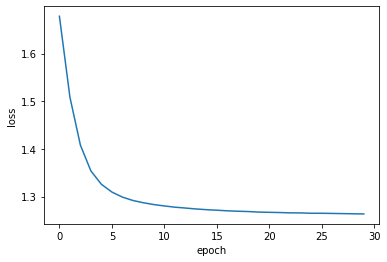

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')